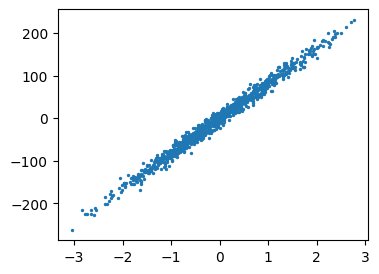

In [5]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams["figure.figsize"] = (4, 3)

n_samples = 1_000
n_outliers = 50

X, y, coef = make_regression(
    n_samples=n_samples,
    n_features=1,
    n_informative=1,
    noise=10,
    coef=True,
    random_state=0
)
plt.scatter(X, y, s=2)
plt.show()

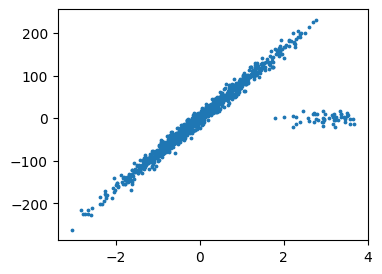

In [9]:
import numpy as np

# adding the outlier
X[:n_outliers] = np.random.normal(loc=3, scale=0.5, size=(n_outliers, 1))
y[:n_outliers] = np.random.normal(loc=-3, scale=10, size=(n_outliers,))
plt.scatter(X, y, s=3)
plt.show()

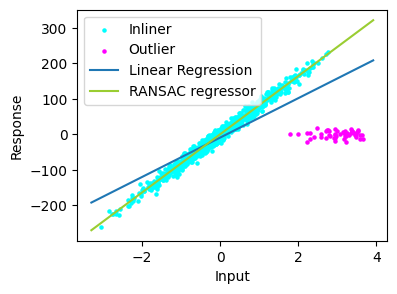

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor

lr = LinearRegression()
lr.fit(X, y)

ransac = RANSACRegressor()
ransac.fit(X, y)

inlier_mask = ransac.inlier_mask_

# scatter the plot
plt.scatter(X[inlier_mask], y[inlier_mask], s=5, c="cyan",label="Inliner")
plt.scatter(X[~inlier_mask], y[~inlier_mask], s=5, c="magenta",label="Outlier")

# draw the hyperplane
xx = np.linspace(X.min() - 0.25, X.max() + 0.25).reshape(-1,1)
lr_y = lr.predict(xx)
ransac_y = ransac.predict(xx)

plt.plot(xx,lr_y,label="Linear Regression")
plt.plot(xx,ransac_y,c="yellowgreen",label="RANSAC regressor")
plt.legend(loc="upper left")
plt.xlabel("Input")
plt.ylabel("Response")

plt.show()

In [15]:
print(f"Original : {coef}")
print(f"RANSAC : {ransac.estimator_.coef_}")
print(f"LR : {lr.coef_}")


Original : 82.1903908407869
RANSAC : [82.08533159]
LR : [55.57900359]
